In [5]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn import preprocessing

In [2]:
df = pd.read_csv("data/classification.csv")

In [6]:
datax = preprocessing.scale(df[['age', 'interest']])
datay = df['success'].to_numpy()

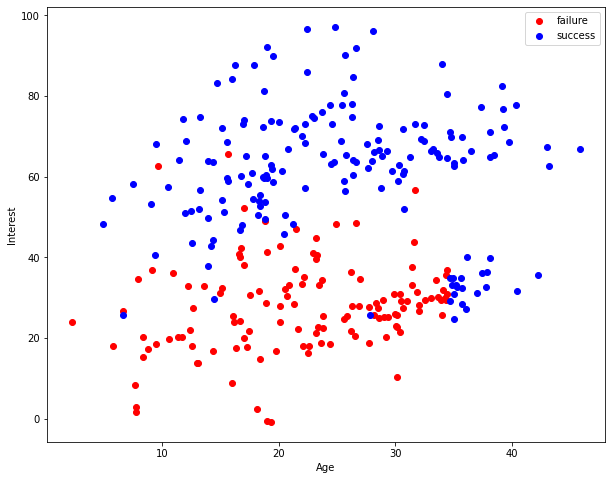

In [16]:
fig = plt.figure(figsize = (10, 8))
plt.scatter(df.loc[df['success'] == 0]['age'], df.loc[df['success'] == 0]['interest'], color = 'red', label = "failure")
plt.scatter(df.loc[df['success'] == 1]['age'], df.loc[df['success'] == 1]['interest'], color = 'blue', label = "success")
plt.xlabel("Age")
plt.ylabel("Interest")
plt.legend()
plt.show()

In [19]:
trainx, testx, trainy, testy = train_test_split(datax, datay, test_size = 0.2)

In [21]:
trainx = trainx.T
testx = testx.T
trainy = trainy.reshape(1, -1)
testy = testy.reshape(1, -1)

In [65]:
def model(x, y, learning_rate, epochs):
    m = x.shape[1]
    n = x.shape[0]
    
    w = np.zeros((1, n))
    b = 0
    
    for i in range(epochs+1):
        h = np.dot(w, x) + b
        z = 1/(1 + np.exp(-h))
        cost = -(1/m) * np.sum((y * np.log(z)) + ((1 - y) * np.log(1 - z)))
        if i % 100 == 0: print("cost at iteration", i,":", cost)
        dw = (1/m) * np.dot((z - y), x.T)
        db = (1/m) * np.sum(z - y)
        w = w - (learning_rate * dw)
        b = b - (learning_rate * db)
    
    return w, b

In [44]:
def score(x, y, w, b):
    m = x.shape[1]
    h = np.dot(w, x) + b
    z = 1/(1 + np.exp(-h))
    z = [(0 if i<0.5 else 1) for i in z[0]]
    score = (1 - np.sum(np.abs(z - y))/m) * 100
    return score

In [68]:
w, b = model(trainx, trainy, 1, 100)

cost at iteration 0 : 0.6931471805599452
cost at iteration 100 : 0.28875988819324466


In [69]:
print(score(testx, testy, w, b))

91.66666666666666


In [70]:
data = pd.DataFrame(np.concatenate((datax, datay.reshape(-1, 1)), axis = 1), columns = ['age', 'interest', 'success'])
start = np.array([-2.5, 2.5])

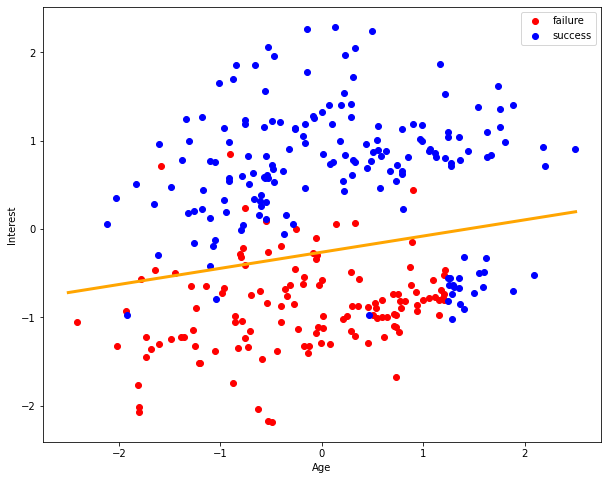

In [71]:
fig = plt.figure(figsize = (10, 8))
plt.scatter(data.loc[df['success'] == 0]['age'], data.loc[data['success'] == 0]['interest'], color = 'red', label = "failure")
plt.scatter(data.loc[df['success'] == 1]['age'], data.loc[data['success'] == 1]['interest'], color = 'blue', label = "success")
plt.plot(start, (w[0, 0] * start - b)/w[0, 1], color = 'orange', linewidth = 3)
plt.xlabel("Age")
plt.ylabel("Interest")
plt.legend()
plt.show()